# Test out dominant column in relation to eigenvalues

Computational tests to determine the influence of the column with the largest L2 norm on the eigenvalues of the gram matrix. The test is performed by generating a random matrix and then scaling one of its columns to be dominant. The eigenvalues of the gram matrix are then computed and compared.

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

First, we create a random matrix, A and random column vector, b. We then scale b by various factors and compute the eigenvectors of the gram matrix, G = A^T A + b b^T. We then compute the angle between the first eigenvector and the scaled column vector b. This angle is expected to be small if the column vector b is dominant in the gram matrix. 

We also compute the eigenvalues of the gram matrix and check if they are close to the square of the L2 norm of the scaled column vector b.

In [12]:
# create random matrix
m = 100  # number of columns
n = 200  # number of rows
A = np.random.rand(n, m)
A_copy = A.copy()

# create random vector
b = np.random.rand(n)

In [20]:
# angle between b and first eignevector of A
angles = []
multiple_of_b = [1, 2, 5, 10, 20, 50, 100, 200, 300, 400, 500, 700, 900, 1000]
column_to_add_to = 3
b_magnitude = []
lambda_max = []

for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    A[:, column_to_add_to] = A_copy[:, column_to_add_to] + added_column
    
    u, v = np.linalg.eig(A @ A.T)

    angle = np.arccos(np.dot(b, v[:, 0]) / (np.linalg.norm(b) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles.append(angle)
    b_magnitude.append(np.linalg.norm(added_column))
    lambda_max.append(u[0])

Text(0.5, 1.0, 'Largest eigenvalue of A vs. magnitude of b')

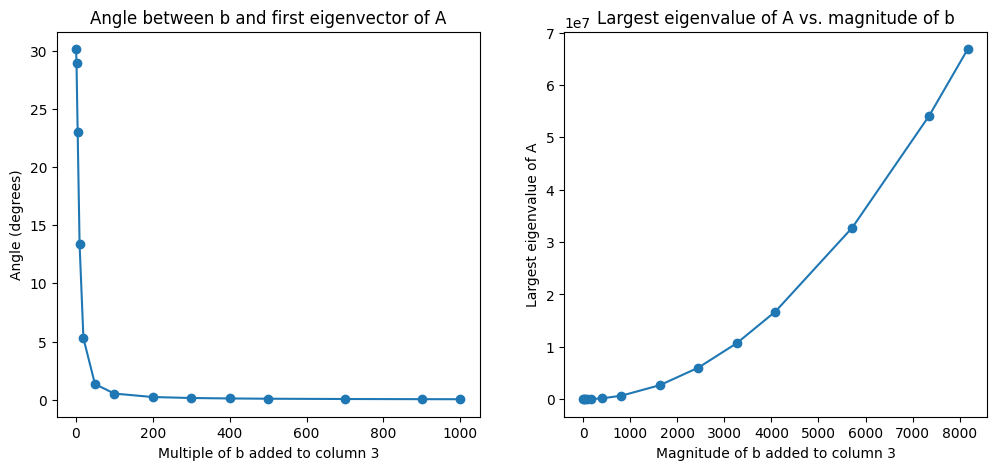

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles], marker='o')
plt.xlabel('Multiple of b added to column 3')
plt.ylabel('Angle (degrees)')
plt.title('Angle between b and first eigenvector of A')
plt.subplot(1, 2, 2)
plt.plot(b_magnitude, lambda_max, marker='o')
plt.xlabel('Magnitude of b added to column 3')
plt.ylabel('Largest eigenvalue of A')
plt.title('Largest eigenvalue of A vs. magnitude of b')
# plt.xscale('log')

## Testing for the case where b is added to all columns of A

We are doing the same thing as above, but now we are adding the column vector b to all columns of A.

In [31]:
angles_all = []
b_magnitude_all = []
lambda_max_all = []


for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    b_magnitude_all.append(np.linalg.norm(added_column))
    # tile the added column to match the shape of A
    added_column = np.tile(added_column, (m, 1)).T
    A = A_copy + added_column
    
    u, v = np.linalg.eig(A @ A.T)

    angle = np.arccos(np.dot(A[:,0], v[:, 0]) / (np.linalg.norm(A[:,0]) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles_all.append(angle)
    lambda_max_all.append(u[0])

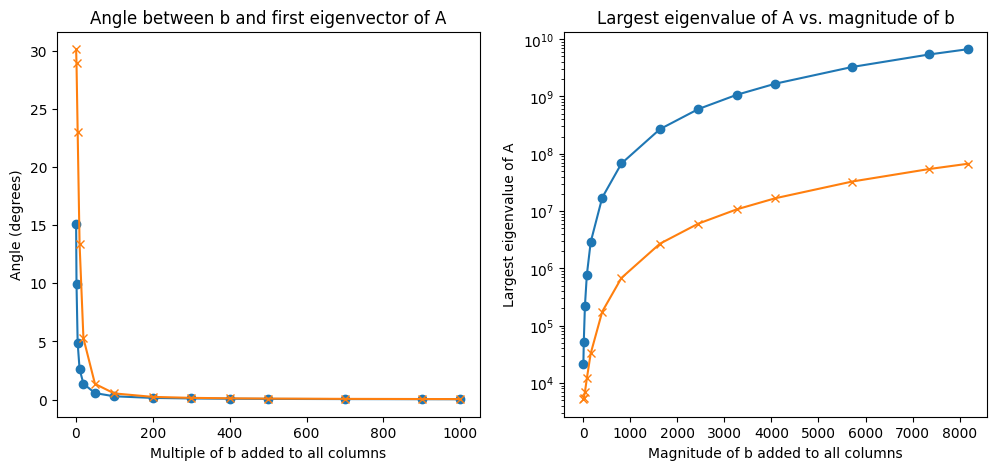

In [45]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles_all], marker='o')
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles], marker='x')
plt.xlabel('Multiple of b added to all columns')
plt.ylabel('Angle (degrees)')
plt.title('Angle between b and first eigenvector of A')
# plt.xscale('log')
plt.subplot(1, 2, 2)
plt.plot(b_magnitude_all, lambda_max_all, marker='o')
plt.plot(b_magnitude, lambda_max, marker='x')
plt.xlabel('Magnitude of b added to all columns')
plt.ylabel('Largest eigenvalue of A')
plt.title('Largest eigenvalue of A vs. magnitude of b')
plt.yscale('log')

d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


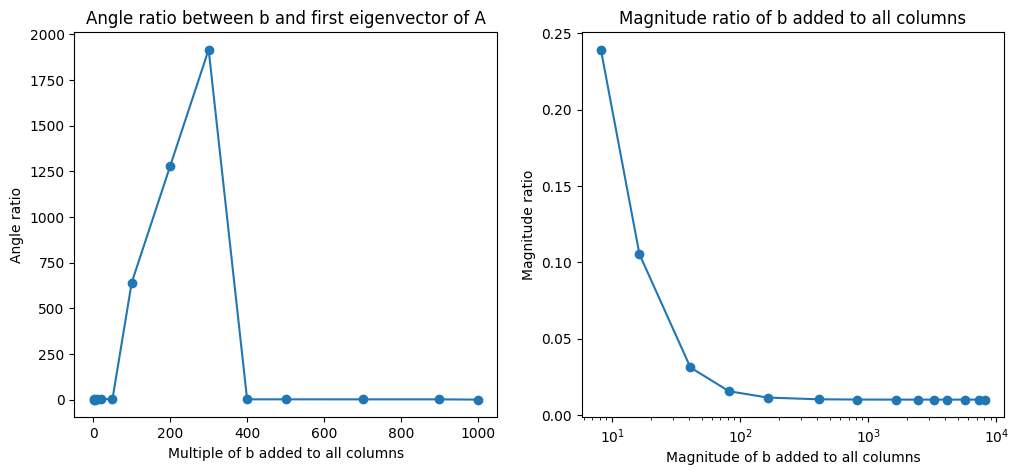

In [42]:
angle_ratio = [a / b for a, b in zip(angles, angles_all)]
magnitude_ratio = [a / b for a, b in zip(lambda_max, lambda_max_all)]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(multiple_of_b, angle_ratio, marker='o')
plt.xlabel('Multiple of b added to all columns')
plt.ylabel('Angle ratio')
plt.title('Angle ratio between b and first eigenvector of A')
plt.subplot(1, 2, 2)
plt.plot(b_magnitude_all, magnitude_ratio, marker='o')
plt.xlabel('Magnitude of b added to all columns')
plt.ylabel('Magnitude ratio')
plt.title('Magnitude ratio of b added to all columns')
plt.xscale('log')

Now, we are going to test the magnitude of the column after b is added. We start with the assumption that without the added column, all the columns of A are of the same magnitude and can be represented in terms of the number of columns, n i.e. $\|A\|_2 = \sqrt{n}$.

In [46]:
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100]
s = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
f = np.zeros((len(n), len(s)))
f2 = np.zeros((len(n), len(s)))
for i in range(len(n)):
    for j in range(len(s)):
        f2[i, j] = 1 / (n[i] * (1 + s[j]))
for i in range(len(n)):
    for j in range(len(s)):
        f[i, j] = (1 + n[i] * s[j]) / (n[i] * (1 + s[j]))

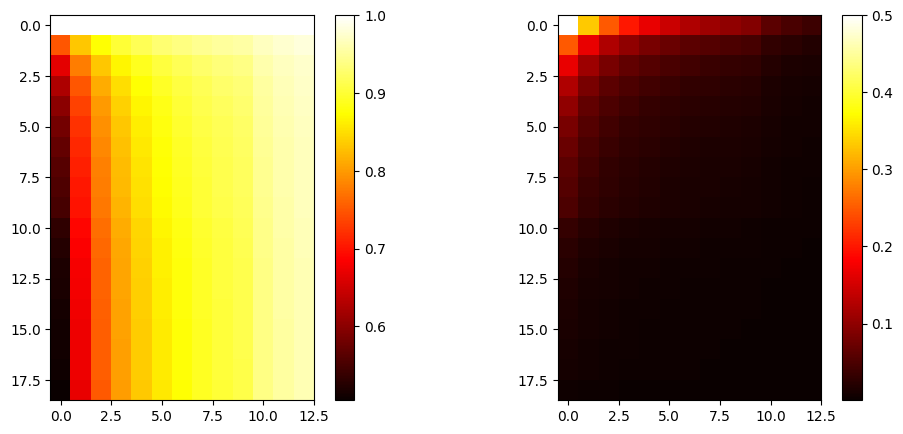

In [47]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(f, cmap='hot')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(f2, cmap='hot')
plt.colorbar()

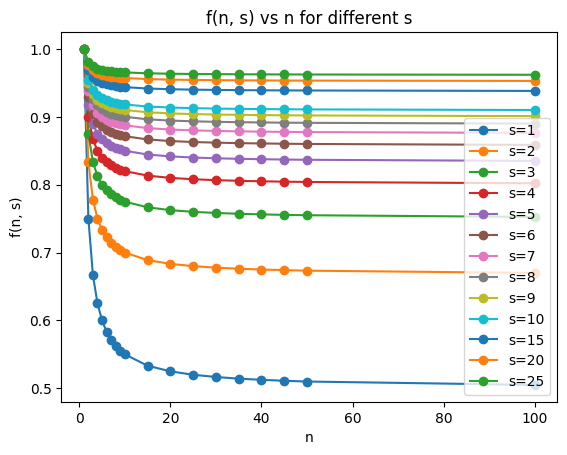

In [19]:
# plt.plot(n, f[:, 0], marker='o', label='s=1')
for i in range(len(s)):
    plt.plot(n, f[:, i], marker='o', label=f's={s[i]}')
plt.xlabel('n')
plt.ylabel('f(n, s)')
plt.title('f(n, s) vs n for different s')
plt.legend()

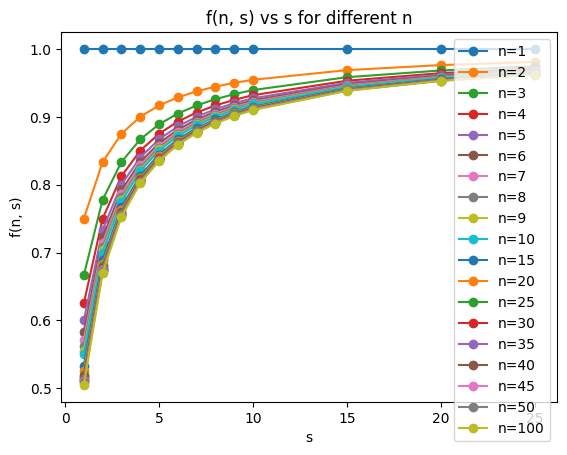

In [20]:
for i in range(len(n)):
    plt.plot(s, f[i], marker='o', label=f'n={n[i]}')
plt.xlabel('s')
plt.ylabel('f(n, s)')
plt.title('f(n, s) vs s for different n')
plt.legend()

Text(0.5, 1.0, 'f(betta) vs betta')

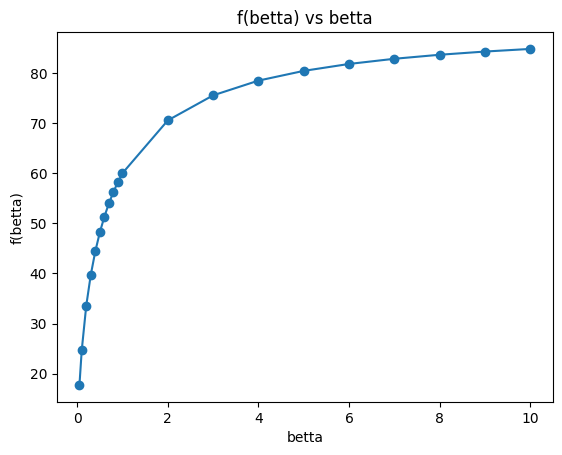

In [10]:
betta = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f_betta = np.zeros(len(betta))
for i in range(len(betta)):
    f_betta[i] = math.degrees(np.arccos(1 / (1 + betta[i])))
plt.figure()
plt.plot(betta, f_betta, marker='o')
plt.xlabel('betta')
plt.ylabel('f(betta)')
plt.title('f(betta) vs betta')

## Makes tests for real data

